In [15]:
import pandas as pd
import numpy as np
data_path="../../"
pd.set_option("display.max_colwidth", 0)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.style.use('ggplot')

In [16]:
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score,precision_score,f1_score, confusion_matrix,roc_auc_score
from sklearn.multiclass import BaseEstimator
# pd.set_option('display.max_columns', None)
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
data_path="../../"

In [17]:
df=pd.read_csv(data_path+"data/zillow_data.csv")
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [18]:
chicago_df=df[df['Metro'] == 'Chicago']
chicago_df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
16,84646,60647,Chicago,IL,Chicago,Cook,17,122700.0,122800.0,122800.0,...,459600,461400,464300,466500,467900,470600,474500,475100,472600,470200
19,84620,60618,Chicago,IL,Chicago,Cook,20,142600.0,143100.0,143400.0,...,462700,461200,459900,459200,458700,457900,457400,459000,462500,464300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14257,84545,60511,Big Rock,IL,Chicago,Kane,14258,167200.0,166600.0,165900.0,...,234000,231400,230000,230400,231900,233600,235200,236500,237300,237600
14275,84400,60150,Malta,IL,Chicago,DeKalb,14276,133000.0,132800.0,132500.0,...,125800,126700,128100,129800,131600,133000,134200,135700,138700,141500
14316,84426,60180,Union,IL,Chicago,McHenry,14317,162900.0,162400.0,161900.0,...,209100,217300,222500,222200,223200,226400,229300,231500,234500,236800
14499,78853,47948,Goodland,IN,Chicago,Newton,14500,NaN,NaN,NaN,...,91100,90100,90000,89100,85600,82200,80300,79600,81300,83200


In [19]:
chicago_df['ROI_5yrs']=((chicago_df['2018-04'] -chicago_df['2013-04'])/chicago_df['2013-04'])*100

In [20]:
plot_Df=chicago_df.sort_values('ROI_5yrs', ascending=False)[:30]
plot_Df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI_5yrs
948,84693,60804,Cicero,IL,Chicago,Cook,949,96500.0,97000.0,97300.0,...,155800,156800,157900,159200,160500,161800,162900,163800,164400,102.712700
383,84340,60085,Waukegan,IL,Chicago,Lake,384,96100.0,96700.0,97100.0,...,107100,107300,106800,107200,107600,108600,110800,113400,114500,83.493590
5896,84403,60153,Maywood,IL,Chicago,Cook,5897,88600.0,88400.0,88000.0,...,128200,130400,133500,136700,139200,142000,144100,144800,145500,80.745342
3337,84364,60110,Carpentersville,IL,Chicago,Kane,3338,112100.0,113100.0,113600.0,...,153200,154300,155200,156500,158100,159200,160100,161800,163200,79.537954
6727,84358,60104,Bellwood,IL,Chicago,Cook,6728,97900.0,98300.0,98600.0,...,139300,141000,142900,144200,145300,146700,148300,149800,150700,76.670574
1392,84541,60505,Aurora,IL,Chicago,Kane,1393,79300.0,80000.0,80200.0,...,118700,119500,120800,122900,125500,127600,129200,131100,132100,76.368491
1496,84648,60651,Chicago,IL,Chicago,Cook,1497,74700.0,75100.0,75400.0,...,136100,137300,139600,141800,142900,145200,148300,150300,150900,76.079347
725,84329,60073,Round Lake Beach,IL,Chicago,Lake,726,125200.0,126100.0,126600.0,...,139700,140400,141200,142300,143400,144600,146300,147700,148100,71.809745
6496,84487,60436,Joliet,IL,Chicago,Will,6497,78200.0,78300.0,78400.0,...,103600,105000,107000,109200,111200,112700,114100,116100,117700,66.478076
658,84639,60639,Chicago,IL,Chicago,Cook,659,111200.0,111900.0,112300.0,...,223100,222900,223300,224600,226100,228700,231400,232700,232600,65.787598


In [21]:
plot_zip= plot_Df.set_index('RegionName', inplace=True)

In [22]:
plot_Df=plot_Df.T

In [23]:
plot_Df

RegionName,60804,60085,60153,60110,60104,60505,60651,60073,60436,60639,...,60612,60164,60501,60131,60162,60409,60123,60647,60632,60622
RegionID,84693,84340,84403,84364,84358,84541,84648,84329,84487,84639,...,84614,84413,84537,84382,84411,84464,84376,84646,84633,84624
City,Cicero,Waukegan,Maywood,Carpentersville,Bellwood,Aurora,Chicago,Round Lake Beach,Joliet,Chicago,...,Chicago,Northlake,Summit,Franklin Park,Hillside,Calumet City,Elgin,Chicago,Chicago,Chicago
State,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,...,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL
Metro,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,...,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago
CountyName,Cook,Lake,Cook,Kane,Cook,Kane,Cook,Lake,Will,Cook,...,Cook,Cook,Cook,Cook,Cook,Cook,Kane,Cook,Cook,Cook
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01,161800,108600,142000,159200,146700,127600,145200,144600,112700,228700,...,353400,181300,162500,184400,171700,82600,178300,474500,164700,819300
2018-02,162900,110800,144100,160100,148300,129200,148300,146300,114100,231400,...,352300,182100,163800,186300,172800,83000,179300,475100,165200,819700
2018-03,163800,113400,144800,161800,149800,131100,150300,147700,116100,232700,...,349000,182600,163300,189200,173500,82800,180400,472600,166100,815400
2018-04,164400,114500,145500,163200,150700,132100,150900,148100,117700,232600,...,345400,182600,162400,191000,173800,82500,180900,470200,166700,811100


In [24]:
clean_zip_Df= plot_Df.drop(['RegionID', 'City',"State","Metro","CountyName","SizeRank","ROI_5yrs"])

In [25]:
clean_zip_Df

RegionName,60804,60085,60153,60110,60104,60505,60651,60073,60436,60639,...,60612,60164,60501,60131,60162,60409,60123,60647,60632,60622
1996-04,96500,96100,88600,112100,97900,79300,74700,125200,78200,111200,...,100900,124400,108300,129100,120300,80900,131800,122700,99600,217000
1996-05,97000,96700,88400,113100,98300,80000,75100,126100,78300,111900,...,101400,124700,108100,129400,120000,81200,132500,122800,100100,216900
1996-06,97300,97100,88000,113600,98600,80200,75400,126600,78400,112300,...,101900,124700,107900,129500,119700,81500,132700,122800,100400,216900
1996-07,97300,97300,87600,113600,98700,80100,75600,126700,78500,112500,...,102300,124400,107600,129500,119300,81500,132400,122700,100400,216800
1996-08,97100,97200,86900,113100,98500,79700,75600,126400,78600,112500,...,102700,123900,107400,129200,119000,81400,131400,122400,100300,216800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12,160500,107600,139200,158100,145300,125500,142900,143400,111200,226100,...,355200,180400,160300,183300,170200,81800,177400,470600,164300,816300
2018-01,161800,108600,142000,159200,146700,127600,145200,144600,112700,228700,...,353400,181300,162500,184400,171700,82600,178300,474500,164700,819300
2018-02,162900,110800,144100,160100,148300,129200,148300,146300,114100,231400,...,352300,182100,163800,186300,172800,83000,179300,475100,165200,819700
2018-03,163800,113400,144800,161800,149800,131100,150300,147700,116100,232700,...,349000,182600,163300,189200,173500,82800,180400,472600,166100,815400


In [26]:
clean_zip_Df.columns

Int64Index([60804, 60085, 60153, 60110, 60104, 60505, 60651, 60073, 60436,
            60639, 60120, 60165, 60160, 60641, 60042, 60163, 60099, 60155,
            60545, 60402, 60612, 60164, 60501, 60131, 60162, 60409, 60123,
            60647, 60632, 60622],
           dtype='int64', name='RegionName')

In [27]:
clean_zip_Df.values

array([[96500.0, 96100.0, 88600.0, ..., 122700.0, 99600.0, 217000.0],
       [97000.0, 96700.0, 88400.0, ..., 122800.0, 100100.0, 216900.0],
       [97300.0, 97100.0, 88000.0, ..., 122800.0, 100400.0, 216900.0],
       ...,
       [162900, 110800, 144100, ..., 475100, 165200, 819700],
       [163800, 113400, 144800, ..., 472600, 166100, 815400],
       [164400, 114500, 145500, ..., 470200, 166700, 811100]],
      dtype=object)

In [28]:
sns.set_style(style="white")
plt.figure(figsize=(20, 10))
sns.lineplot(x=clean_zip_Df.index,y=clean_zip_Df.values);
plt.title("Number of Wells per Class",fontsize=26);
plt.ylabel("Number of Wells",fontsize=18)
plt.xlabel("Class of Well",fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18);
plt.savefig('../../reports/figures/Wellsgrouping.png', transparent=True,dpi=300, bbox_inches = "tight")

Exception: Data must be 1-dimensional

<Figure size 1440x720 with 0 Axes>

AttributeError: 'function' object has no attribute 'scatter'

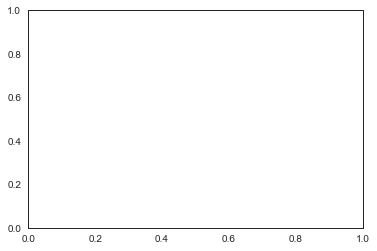

In [29]:
fig, ax = plt.subplots()
ax.plot.scatter(clean_zip_Df.values, clean_zip_Df.values)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')

fig.savefig("test.png")
plt.show()

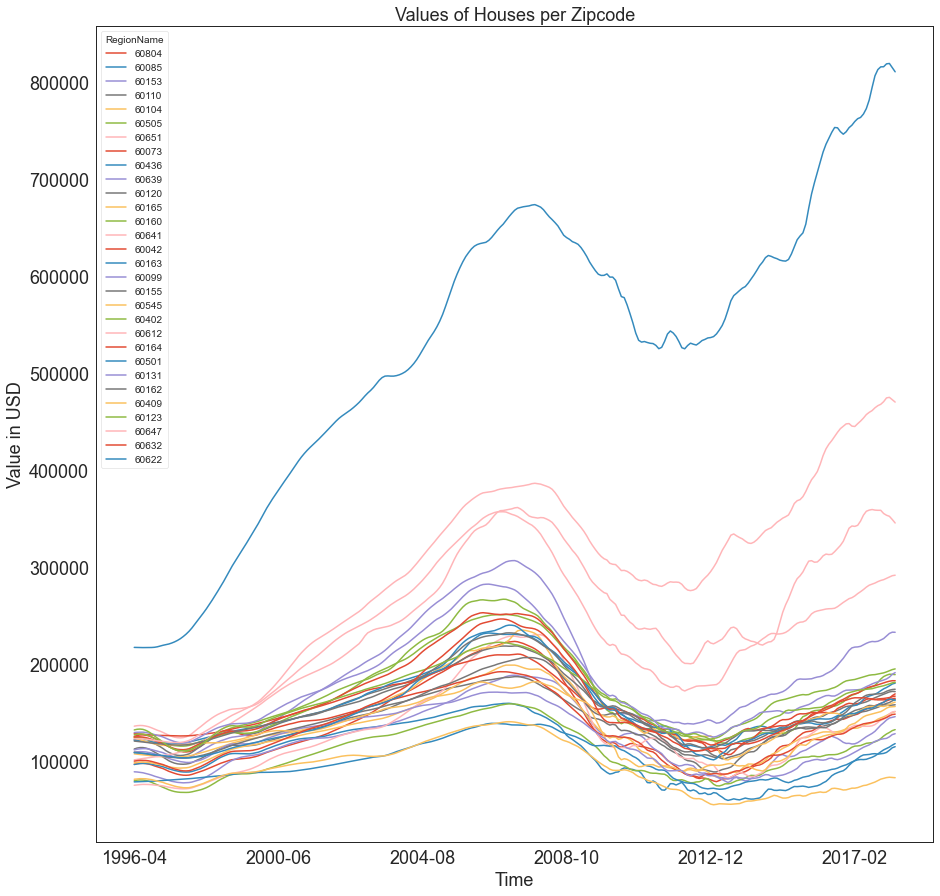

In [74]:
fig, ax=plt.subplots(figsize=(15,15))
clean_zip_Df.plot(ax=ax);
ax.set_xlabel("Time", fontsize=18)
ax.set_ylabel("Value in USD", fontsize=18)
ax.tick_params(axis="both",which="major",labelsize=18)
# plt.legend(loc="center right", bbox_to_anchor=(1.12,.5), ncol=1,fontsize=14)
ax.set_title("Values of Houses per Zipcode", fontsize=18)
plt.savefig("Values Per Zip code",transparent=True,pad_inches=2,bbodx_inches="tight")

In [31]:
clean_zip_Df

RegionName,60804,60085,60153,60110,60104,60505,60651,60073,60436,60639,...,60612,60164,60501,60131,60162,60409,60123,60647,60632,60622
1996-04,96500,96100,88600,112100,97900,79300,74700,125200,78200,111200,...,100900,124400,108300,129100,120300,80900,131800,122700,99600,217000
1996-05,97000,96700,88400,113100,98300,80000,75100,126100,78300,111900,...,101400,124700,108100,129400,120000,81200,132500,122800,100100,216900
1996-06,97300,97100,88000,113600,98600,80200,75400,126600,78400,112300,...,101900,124700,107900,129500,119700,81500,132700,122800,100400,216900
1996-07,97300,97300,87600,113600,98700,80100,75600,126700,78500,112500,...,102300,124400,107600,129500,119300,81500,132400,122700,100400,216800
1996-08,97100,97200,86900,113100,98500,79700,75600,126400,78600,112500,...,102700,123900,107400,129200,119000,81400,131400,122400,100300,216800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12,160500,107600,139200,158100,145300,125500,142900,143400,111200,226100,...,355200,180400,160300,183300,170200,81800,177400,470600,164300,816300
2018-01,161800,108600,142000,159200,146700,127600,145200,144600,112700,228700,...,353400,181300,162500,184400,171700,82600,178300,474500,164700,819300
2018-02,162900,110800,144100,160100,148300,129200,148300,146300,114100,231400,...,352300,182100,163800,186300,172800,83000,179300,475100,165200,819700
2018-03,163800,113400,144800,161800,149800,131100,150300,147700,116100,232700,...,349000,182600,163300,189200,173500,82800,180400,472600,166100,815400


In [32]:
plot_Df = plot_Df.T
plot_Df

,RegionID,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI_5yrs
RegionName,,,,,,,,,,,,,,,,,,,,,
60804,84693,Cicero,IL,Chicago,Cook,949,96500,97000,97300,97300,...,155800,156800,157900,159200,160500,161800,162900,163800,164400,102.713
60085,84340,Waukegan,IL,Chicago,Lake,384,96100,96700,97100,97300,...,107100,107300,106800,107200,107600,108600,110800,113400,114500,83.4936
60153,84403,Maywood,IL,Chicago,Cook,5897,88600,88400,88000,87600,...,128200,130400,133500,136700,139200,142000,144100,144800,145500,80.7453
60110,84364,Carpentersville,IL,Chicago,Kane,3338,112100,113100,113600,113600,...,153200,154300,155200,156500,158100,159200,160100,161800,163200,79.538
60104,84358,Bellwood,IL,Chicago,Cook,6728,97900,98300,98600,98700,...,139300,141000,142900,144200,145300,146700,148300,149800,150700,76.6706
60505,84541,Aurora,IL,Chicago,Kane,1393,79300,80000,80200,80100,...,118700,119500,120800,122900,125500,127600,129200,131100,132100,76.3685
60651,84648,Chicago,IL,Chicago,Cook,1497,74700,75100,75400,75600,...,136100,137300,139600,141800,142900,145200,148300,150300,150900,76.0793
60073,84329,Round Lake Beach,IL,Chicago,Lake,726,125200,126100,126600,126700,...,139700,140400,141200,142300,143400,144600,146300,147700,148100,71.8097
60436,84487,Joliet,IL,Chicago,Will,6497,78200,78300,78400,78500,...,103600,105000,107000,109200,111200,112700,114100,116100,117700,66.4781


In [33]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City',
                                  'State', 'Metro', 'CountyName', 'RegionID', 'SizeRank'],
                     var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

In [34]:
plot_melted = melt_data(plot_Df.drop(['ROI_5yrs'], axis=1))

KeyError: "The following 'id_vars' are not present in the DataFrame: ['RegionName']"

In [35]:
plot_melted

NameError: name 'plot_melted' is not defined

In [36]:
plot_melted.set_index('time', inplace=True)

NameError: name 'plot_melted' is not defined

In [37]:
plot_melted

NameError: name 'plot_melted' is not defined

In [38]:
plot_melted.RegionName.plot()

NameError: name 'plot_melted' is not defined

In [39]:
plot_Df = pd.DataFrame(index=dates, columns=regions)

NameError: name 'dates' is not defined

62448-misssing value from chicago df


In [40]:
good_df=melt_data(df)
good_df

,RegionName,City,State,Metro,CountyName,RegionID,SizeRank,time,value
0,60657,Chicago,IL,Chicago,Cook,84654,1,1996-04-01,334200.0
1,75070,McKinney,TX,Dallas-Fort Worth,Collin,90668,2,1996-04-01,235700.0
2,77494,Katy,TX,Houston,Harris,91982,3,1996-04-01,210400.0
3,60614,Chicago,IL,Chicago,Cook,84616,4,1996-04-01,498100.0
4,79936,El Paso,TX,El Paso,El Paso,93144,5,1996-04-01,77300.0
...,...,...,...,...,...,...,...,...,...
3901590,1338,Ashfield,MA,Greenfield Town,Franklin,58333,14719,2018-04-01,209300.0
3901591,3293,Woodstock,NH,Claremont,Grafton,59107,14720,2018-04-01,225800.0
3901592,40404,Berea,KY,Richmond,Madison,75672,14721,2018-04-01,133400.0
3901593,81225,Mount Crested Butte,CO,NaN,Gunnison,93733,14722,2018-04-01,664400.0


In [41]:
df.dtypes

RegionID      int64 
RegionName    int64 
City          object
State         object
Metro         object
               ...  
2017-12       int64 
2018-01       int64 
2018-02       int64 
2018-03       int64 
2018-04       int64 
Length: 272, dtype: object

In [42]:
my_regions.ROI_5yrs.plot(figsize = (22,8), style = 'b.')
plt.show()

NameError: name 'my_regions' is not defined

In [ ]:
my_regions.set_index('time', inplace=True)


In [ ]:
my_regions

In [ ]:
my_regions['value'].plot(figsize = (14,5));

In [43]:
ts_dr = pd.date_range(my_regions.index["2013-04-01"], my_regions.index("2018-04-01"))


NameError: name 'my_regions' is not defined

In [44]:
# import os, sys
# module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
# if module_path not in sys.path:
#     sys.path.append(module_path)